평균 => np.maen()
표준편차 => np.std()
변동계수 => (표준편차/평균) * 100

7주차 확률
순서                순서 고려                순서 고려하지 않음
반복 허용         중복순열(product)      중복조합(combinations_with_replacemnet)
반복 허용 안함     순열(permutations)    조합(combinations)

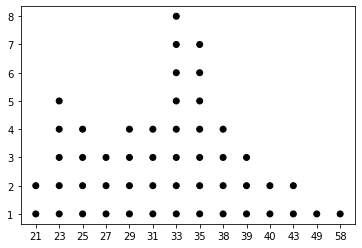

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = [31, 40, 38, 31, 33, 21, 35, 25, 35, 43,
        39, 29, 35, 23, 33, 33, 23, 39, 33, 40,
        25, 21, 35, 33, 29, 25, 43, 29, 35, 38,
        31, 31, 27, 29, 35, 23, 27, 27, 25, 23,
        35, 33, 49, 33, 39, 38, 23, 33, 58, 38]

#점도표
idx = np.unique(data)
value = [data.count(i) for i in idx]

x = np.arange(len(idx)) + 1
y = np.arange(1, max(value) + 1)
X, Y = np.meshgrid(x, y)

plt.scatter(X, Y, c = Y<=value, cmap='Greys')
plt.xticks(ticks=x, labels=idx)
plt.show()

In [2]:
import math
import pandas as pd
k = 5 #계급의 수
R = max(data) - min(data) 
w = math.ceil(R/k) #간격
s = min(data) - 0.5 #시작값

bins = [s + w*i for i in range(k+1)]
index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(k)]

hist, bins = np.histogram(data, bins)

df = pd.DataFrame(hist, index, columns=['도수'])
df.index.name = '계급간격'

df['상대도수'] = [hist[i]/sum(hist) for i in range(k)]
df['누적도수'] = [sum(hist[:i+1]) if i>0 else hist[i] for i in range(k)]
tmp = df['상대도수']
df['누적상대도수'] = [sum(tmp[:i+1]) if i>0 else tmp[i] for i in range(k)]

tmp = [(bins[i] + bins[i+1]) for i in range(k)]
df['계긊값'] = [i/2 for i in tmp]
df.loc['합계'] = [sum(df['도수']), sum(df['상대도수']), '', '', '']
df
 

,도수,상대도수,누적도수,누적상대도수,계긊값
계급간격,,,,,
20.5 ~ 28.5,14,0.28,14,0.28,24.5
28.5 ~ 36.5,23,0.46,37,0.74,32.5
36.5 ~ 44.5,11,0.22,48,0.96,40.5
44.5 ~ 52.5,1,0.02,49,0.98,48.5
52.5 ~ 60.5,1,0.02,50,1.0,56.5
합계,50,1.00,,,


In [61]:
data = [281, 238, 16, 11, 41, 80, 89, 52, 572, 257, 209, 25, 150, 529, 202, 267, 153, 29, 80, 21, 133, 46, 397, 148, 698, 422, 415]
AVG = np.mean(data)
STD = np.std(data, ddof=0)
val = sorted(data)
M = np.median(val)
q3 = np.percentile(val, [75], interpolation='linear')
print(q3)


[274.]


/var/folders/ds/3pccrhwd1hb9q3h_5q7b1cp80000gn/T/ipykernel_95335/1457711157.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile(val, [75], interpolation='linear')
